In [1]:
## Data download from https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/12500/1375107/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1621232266&Signature=WYTZGnQHtz8dQFpP9VWTwKFeYQHHMbMvBCwwksTfCHaWZYxovaDkjosluQ7%2BZJAlYKKfo%2FtH5OlP7whSPnxrsjNXEUz2%2FJ6Fy7R40%2BcExck9TA0mAfA0DUXQbhv0J5qNjQ3y1KTBEmBAC9ANCFrDxm7EBd6ZhEkGruZ%2F3dQ%2BfAMcwT9qI7XbsGsPVe03UDWnXr%2FtQjjhuSdYwoE8dYndSWAJxX3Zgw8mCy6hBdITWjew0Pdj%2FxjbdsVyCP88n9Ldfil%2FArvi9hOmt%2F1N3ubxyyrpLvcjQyxc8fZUrY8fLSFo4ofDGDJeZdRZei9yE3aTTYHvqFHNhFbZTKPG8sBehQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip" -c -O 'train.csv.zip'
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/12500/1375107/compressed/test.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1621232244&Signature=RounJhcdp23fVwNJQ2fvaEfEZ0ng6hxPyLo0nO0g6ZX8lC8pVRU5cXHJ%2B8bumJSBhSmN4F%2Fah%2BcInHrj%2B3ODFvOWkYtsGNrQr%2FE8YCCuuUEaUVQzUCQub4ba2ss0UAl785y1tt4MFdSnP%2B9pzZDWVJc5HcMTECLQq0GZy3P45Ip9thFmN6FNeD0p%2BeQUV8zWLndY5gJaedDpYAVpojL5wt8Pp4J8FExWul%2FvGeQsrs2Vq%2FN4HU%2FsxtqR75y1rKnidl6QVCbdwnL02Dl%2FJ%2FjVTlidggp5mhPkyVLZXMlBapuPs3Xm%2BE8dcaNtINcB6jOtA81CyjcjEm3Cgjuw2Alzng%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv.zip" -c -O 'CurlWget621'

--2021-05-15 10:49:11--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/12500/1375107/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1621232266&Signature=WYTZGnQHtz8dQFpP9VWTwKFeYQHHMbMvBCwwksTfCHaWZYxovaDkjosluQ7%2BZJAlYKKfo%2FtH5OlP7whSPnxrsjNXEUz2%2FJ6Fy7R40%2BcExck9TA0mAfA0DUXQbhv0J5qNjQ3y1KTBEmBAC9ANCFrDxm7EBd6ZhEkGruZ%2F3dQ%2BfAMcwT9qI7XbsGsPVe03UDWnXr%2FtQjjhuSdYwoE8dYndSWAJxX3Zgw8mCy6hBdITWjew0Pdj%2FxjbdsVyCP88n9Ldfil%2FArvi9hOmt%2F1N3ubxyyrpLvcjQyxc8fZUrY8fLSFo4ofDGDJeZdRZei9yE3aTTYHvqFHNhFbZTKPG8sBehQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.

In [1]:
## importing usefull libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score
from scipy.sparse import vstack

##Source: https://stackoverflow.com/a/14463362/8211103
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/content/train.csv.zip')

In [3]:
##Source: https://www.kaggle.com/nz0722/simple-eda-text-preprocessing-jigsaw?scriptVersionId=13998319&cellId=53
## Apllying basic preprocessin
contraction_mapping = {
    "Trump's" : 'trump is',"'cause": 'because',',cause': 'because',';cause': 'because',"ain't": 'am not','ain,t': 'am not',
    'ain;t': 'am not','ain´t': 'am not','ain’t': 'am not',"aren't": 'are not',
    'aren,t': 'are not','aren;t': 'are not','aren´t': 'are not','aren’t': 'are not',"can't": 'cannot',"can't've": 'cannot have','can,t': 'cannot','can,t,ve': 'cannot have',
    'can;t': 'cannot','can;t;ve': 'cannot have',
    'can´t': 'cannot','can´t´ve': 'cannot have','can’t': 'cannot','can’t’ve': 'cannot have',
    "could've": 'could have','could,ve': 'could have','could;ve': 'could have',"couldn't": 'could not',"couldn't've": 'could not have','couldn,t': 'could not','couldn,t,ve': 'could not have','couldn;t': 'could not',
    'couldn;t;ve': 'could not have','couldn´t': 'could not',
    'couldn´t´ve': 'could not have','couldn’t': 'could not','couldn’t’ve': 'could not have','could´ve': 'could have',
    'could’ve': 'could have',"didn't": 'did not','didn,t': 'did not','didn;t': 'did not','didn´t': 'did not',
    'didn’t': 'did not',"doesn't": 'does not','doesn,t': 'does not','doesn;t': 'does not','doesn´t': 'does not',
    'doesn’t': 'does not',"don't": 'do not','don,t': 'do not','don;t': 'do not','don´t': 'do not','don’t': 'do not',
    "hadn't": 'had not',"hadn't've": 'had not have','hadn,t': 'had not','hadn,t,ve': 'had not have','hadn;t': 'had not',
    'hadn;t;ve': 'had not have','hadn´t': 'had not','hadn´t´ve': 'had not have','hadn’t': 'had not','hadn’t’ve': 'had not have',"hasn't": 'has not','hasn,t': 'has not','hasn;t': 'has not','hasn´t': 'has not','hasn’t': 'has not',
    "haven't": 'have not','haven,t': 'have not','haven;t': 'have not','haven´t': 'have not','haven’t': 'have not',"he'd": 'he would',
    "he'd've": 'he would have',"he'll": 'he will',
    "he's": 'he is','he,d': 'he would','he,d,ve': 'he would have','he,ll': 'he will','he,s': 'he is','he;d': 'he would',
    'he;d;ve': 'he would have','he;ll': 'he will','he;s': 'he is','he´d': 'he would','he´d´ve': 'he would have','he´ll': 'he will',
    'he´s': 'he is','he’d': 'he would','he’d’ve': 'he would have','he’ll': 'he will','he’s': 'he is',"how'd": 'how did',"how'll": 'how will',
    "how's": 'how is','how,d': 'how did','how,ll': 'how will','how,s': 'how is','how;d': 'how did','how;ll': 'how will',
    'how;s': 'how is','how´d': 'how did','how´ll': 'how will','how´s': 'how is','how’d': 'how did','how’ll': 'how will',
    'how’s': 'how is',"i'd": 'i would',"i'll": 'i will',"i'm": 'i am',"i've": 'i have','i,d': 'i would','i,ll': 'i will',
    'i,m': 'i am','i,ve': 'i have','i;d': 'i would','i;ll': 'i will','i;m': 'i am','i;ve': 'i have',"isn't": 'is not',
    'isn,t': 'is not','isn;t': 'is not','isn´t': 'is not','isn’t': 'is not',"it'd": 'it would',"it'll": 'it will',"It's":'it is',
    "it's": 'it is','it,d': 'it would','it,ll': 'it will','it,s': 'it is','it;d': 'it would','it;ll': 'it will','it;s': 'it is','it´d': 'it would','it´ll': 'it will','it´s': 'it is',
    'it’d': 'it would','it’ll': 'it will','it’s': 'it is',
    'i´d': 'i would','i´ll': 'i will','i´m': 'i am','i´ve': 'i have','i’d': 'i would','i’ll': 'i will','i’m': 'i am',
    'i’ve': 'i have',"let's": 'let us','let,s': 'let us','let;s': 'let us','let´s': 'let us',
    'let’s': 'let us',"ma'am": 'madam','ma,am': 'madam','ma;am': 'madam',"mayn't": 'may not','mayn,t': 'may not','mayn;t': 'may not',
    'mayn´t': 'may not','mayn’t': 'may not','ma´am': 'madam','ma’am': 'madam',"might've": 'might have','might,ve': 'might have','might;ve': 'might have',"mightn't": 'might not','mightn,t': 'might not','mightn;t': 'might not','mightn´t': 'might not',
    'mightn’t': 'might not','might´ve': 'might have','might’ve': 'might have',"must've": 'must have','must,ve': 'must have','must;ve': 'must have',
    "mustn't": 'must not','mustn,t': 'must not','mustn;t': 'must not','mustn´t': 'must not','mustn’t': 'must not','must´ve': 'must have',
    'must’ve': 'must have',"needn't": 'need not','needn,t': 'need not','needn;t': 'need not','needn´t': 'need not','needn’t': 'need not',"oughtn't": 'ought not','oughtn,t': 'ought not','oughtn;t': 'ought not',
    'oughtn´t': 'ought not','oughtn’t': 'ought not',"sha'n't": 'shall not','sha,n,t': 'shall not','sha;n;t': 'shall not',"shan't": 'shall not',
    'shan,t': 'shall not','shan;t': 'shall not','shan´t': 'shall not','shan’t': 'shall not','sha´n´t': 'shall not','sha’n’t': 'shall not',
    "she'd": 'she would',"she'll": 'she will',"she's": 'she is','she,d': 'she would','she,ll': 'she will',
    'she,s': 'she is','she;d': 'she would','she;ll': 'she will','she;s': 'she is','she´d': 'she would','she´ll': 'she will',
    'she´s': 'she is','she’d': 'she would','she’ll': 'she will','she’s': 'she is',"should've": 'should have','should,ve': 'should have','should;ve': 'should have',
    "shouldn't": 'should not','shouldn,t': 'should not','shouldn;t': 'should not','shouldn´t': 'should not','shouldn’t': 'should not','should´ve': 'should have',
    'should’ve': 'should have',"that'd": 'that would',"that's": 'that is','that,d': 'that would','that,s': 'that is','that;d': 'that would',
    'that;s': 'that is','that´d': 'that would','that´s': 'that is','that’d': 'that would','that’s': 'that is',"there'd": 'there had',
    "there's": 'there is','there,d': 'there had','there,s': 'there is','there;d': 'there had','there;s': 'there is',
    'there´d': 'there had','there´s': 'there is','there’d': 'there had','there’s': 'there is',
    "they'd": 'they would',"they'll": 'they will',"they're": 'they are',"they've": 'they have',
    'they,d': 'they would','they,ll': 'they will','they,re': 'they are','they,ve': 'they have','they;d': 'they would','they;ll': 'they will','they;re': 'they are',
    'they;ve': 'they have','they´d': 'they would','they´ll': 'they will','they´re': 'they are','they´ve': 'they have','they’d': 'they would','they’ll': 'they will',
    'they’re': 'they are','they’ve': 'they have',"wasn't": 'was not','wasn,t': 'was not','wasn;t': 'was not','wasn´t': 'was not',
    'wasn’t': 'was not',"we'd": 'we would',"we'll": 'we will',"we're": 'we are',"we've": 'we have','we,d': 'we would','we,ll': 'we will',
    'we,re': 'we are','we,ve': 'we have','we;d': 'we would','we;ll': 'we will','we;re': 'we are','we;ve': 'we have',
    "weren't": 'were not','weren,t': 'were not','weren;t': 'were not','weren´t': 'were not','weren’t': 'were not','we´d': 'we would','we´ll': 'we will',
    'we´re': 'we are','we´ve': 'we have','we’d': 'we would','we’ll': 'we will','we’re': 'we are','we’ve': 'we have',"what'll": 'what will',"what're": 'what are',"what's": 'what is',
    "what've": 'what have','what,ll': 'what will','what,re': 'what are','what,s': 'what is','what,ve': 'what have','what;ll': 'what will','what;re': 'what are',
    'what;s': 'what is','what;ve': 'what have','what´ll': 'what will',
    'what´re': 'what are','what´s': 'what is','what´ve': 'what have','what’ll': 'what will','what’re': 'what are','what’s': 'what is',
    'what’ve': 'what have',"where'd": 'where did',"where's": 'where is','where,d': 'where did','where,s': 'where is','where;d': 'where did',
    'where;s': 'where is','where´d': 'where did','where´s': 'where is','where’d': 'where did','where’s': 'where is',
    "who'll": 'who will',"who's": 'who is','who,ll': 'who will','who,s': 'who is','who;ll': 'who will','who;s': 'who is',
    'who´ll': 'who will','who´s': 'who is','who’ll': 'who will','who’s': 'who is',"won't": 'will not','won,t': 'will not','won;t': 'will not',
    'won´t': 'will not','won’t': 'will not',"wouldn't": 'would not','wouldn,t': 'would not','wouldn;t': 'would not','wouldn´t': 'would not',
    'wouldn’t': 'would not',"you'd": 'you would',"you'll": 'you will',"you're": 'you are','you,d': 'you would','you,ll': 'you will',
    'you,re': 'you are','you;d': 'you would','you;ll': 'you will',
    'you;re': 'you are','you´d': 'you would','you´ll': 'you will','you´re': 'you are','you’d': 'you would','you’ll': 'you will','you’re': 'you are',
    '´cause': 'because','’cause': 'because',"you've": "you have","could'nt": 'could not',
    "havn't": 'have not',"here’s": "here is",'i""m': 'i am',"i'am": 'i am',"i'l": "i will","i'v": 'i have',"wan't": 'want',"was'nt": "was not","who'd": "who would",
    "who're": "who are","who've": "who have","why'd": "why would","would've": "would have","y'all": "you all","y'know": "you know","you.i": "you i",
    "your'e": "you are","arn't": "are not","agains't": "against","c'mon": "common","doens't": "does not",'don""t': "do not","dosen't": "does not",
    "dosn't": "does not","shoudn't": "should not","that'll": "that will","there'll": "there will","there're": "there are",
    "this'll": "this all","u're": "you are", "ya'll": "you all","you'r": "you are","you’ve": "you have","d'int": "did not","did'nt": "did not","din't": "did not","dont't": "do not","gov't": "government",
    "i'ma": "i am","is'nt": "is not","‘I":'I',
    'ᴀɴᴅ':'and','ᴛʜᴇ':'the','ʜᴏᴍᴇ':'home','ᴜᴘ':'up','ʙʏ':'by','ᴀᴛ':'at','…and':'and','civilbeat':'civil beat',\
    'TrumpCare':'Trump care','Trumpcare':'Trump care', 'OBAMAcare':'Obama care','ᴄʜᴇᴄᴋ':'check','ғᴏʀ':'for','ᴛʜɪs':'this','ᴄᴏᴍᴘᴜᴛᴇʀ':'computer',\
    'ᴍᴏɴᴛʜ':'month','ᴡᴏʀᴋɪɴɢ':'working','ᴊᴏʙ':'job','ғʀᴏᴍ':'from','Sᴛᴀʀᴛ':'start','gubmit':'submit','CO₂':'carbon dioxide','ғɪʀsᴛ':'first',\
    'ᴇɴᴅ':'end','ᴄᴀɴ':'can','ʜᴀᴠᴇ':'have','ᴛᴏ':'to','ʟɪɴᴋ':'link','ᴏғ':'of','ʜᴏᴜʀʟʏ':'hourly','ᴡᴇᴇᴋ':'week','ᴇɴᴅ':'end','ᴇxᴛʀᴀ':'extra',\
    'Gʀᴇᴀᴛ':'great','sᴛᴜᴅᴇɴᴛs':'student','sᴛᴀʏ':'stay','ᴍᴏᴍs':'mother','ᴏʀ':'or','ᴀɴʏᴏɴᴇ':'anyone','ɴᴇᴇᴅɪɴɢ':'needing','ᴀɴ':'an','ɪɴᴄᴏᴍᴇ':'income',\
    'ʀᴇʟɪᴀʙʟᴇ':'reliable','ғɪʀsᴛ':'first','ʏᴏᴜʀ':'your','sɪɢɴɪɴɢ':'signing','ʙᴏᴛᴛᴏᴍ':'bottom','ғᴏʟʟᴏᴡɪɴɢ':'following','Mᴀᴋᴇ':'make',\
    'ᴄᴏɴɴᴇᴄᴛɪᴏɴ':'connection','ɪɴᴛᴇʀɴᴇᴛ':'internet','financialpost':'financial post', 'ʜaᴠᴇ':' have ', 'ᴄaɴ':' can ', 'Maᴋᴇ':' make ', 'ʀᴇʟɪaʙʟᴇ':' reliable ', 'ɴᴇᴇᴅ':' need ',
    'ᴏɴʟʏ':' only ', 'ᴇxᴛʀa':' extra ', 'aɴ':' an ', 'aɴʏᴏɴᴇ':' anyone ', 'sᴛaʏ':' stay ', 'Sᴛaʀᴛ':' start', 'SHOPO':'shop',
    }

def contractions(txt):
    for k,v in contraction_mapping.items():
        txt = txt.replace(k,v)
    return txt


def preprocessing(txt):
    txt = contractions(txt)
    txt = re.sub("[^a-zA-Z]+", " ", txt)
    txt = txt.lower()
    txt = re.sub(' +', ' ',txt)
    return txt

data['comment_text'] = data['comment_text'].apply(preprocessing)

In [4]:
# Train Test split
data = data[['comment_text','target']]
data['target'] = (data['target']>=.5).astype('int')

y = data['target'] 
x_train,x_test,y_train,y_test = train_test_split(data['comment_text'],y,stratify=y,test_size=0.2)

x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

del data

In [5]:
## Apply tfidf
tfidf = TfidfVectorizer(min_df=5000)
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1443899, 1410), (1443899,), (360975, 1410), (360975,))

In [ ]:
## parameter tunning (didn't apllied more params because lack of computational power)
xgb = XGBClassifier()
params = {
    "max_depth":[5,10,15,20,25,30],
    "learning_rate":[0.01,0.001,0.1,0.0001]
}
rs = RandomizedSearchCV(xgb, params, random_state=0,return_train_score=True,verbose=10,cv=3,n_jobs=-1)
rs.fit(x_train,y_train)
rs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 205.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 282.4min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 370.5min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 564.4min remaining: 62.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 598.6min finished


{'learning_rate': 0.1, 'max_depth': 15}

In [7]:
## train model
xgb = XGBClassifier(learning_rate=0.1,max_depth=15,n_estimators=3000,tree_method='gpu_hist',nthred=-1,scale_pos_weight=((len(y_train) - sum(y_train)) / sum(y_train)))
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=3000, n_jobs=1,
              nthread=None, nthred=-1, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=11.5048628612504, seed=None, silent=None,
              subsample=1, tree_method='gpu_hist', verbosity=1)

0.5105556719569285


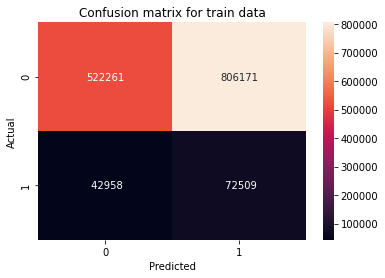

In [8]:
## Train data evalution
y = xgb.predict_proba(x_train)
print(roc_auc_score(y_train,y[:,1]))
cm = confusion_matrix(y_train,xgb.predict(x_train))
sns.heatmap(cm,annot=True,fmt="6d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for train data')
plt.show()

0.505846064856413


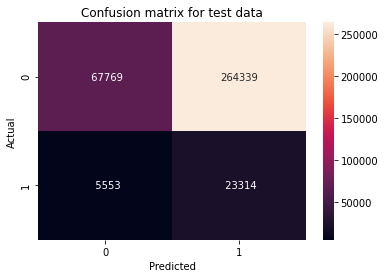

In [9]:
## Test data evalution
y = xgb.predict_proba(x_test)
print(roc_auc_score(y_test,y[:,1]))
cm = confusion_matrix(y_test,xgb.predict(x_test))
sns.heatmap(cm,annot=True,fmt="6d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for test data')
plt.show()

In [10]:
## ALL RATES
print(f"TPR = {cm[1,1]/sum(cm[1])}")
print(f"TNR = {cm[0,0]/sum(cm[0])}")
print(f"FPR = {cm[0,1]/sum(cm[0])}")
print(f"FNR = {cm[1,0]/sum(cm[1])}")

TPR = 0.8076350157619427
TNR = 0.20405711395088344
FPR = 0.7959428860491166
FNR = 0.19236498423805728


In [11]:
## Precision and recall
pr = cm[1,1]/sum(cm[:,1])
recall = cm[1,1]/sum(cm[1])
f1 = (pr*recall)/(pr + recall)
print(f"Precision = {pr}")
print(f"Recall = {recall}")
print(f"F1-Score = {f1}")

Precision = 0.08104904172735901
Recall = 0.8076350157619427
F1-Score = 0.07365727284215848
